In [21]:
import pandas as pd
import seaborn.objects as so 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns


In [22]:
df_melted = pd.read_csv('../spark-job-with-sparknlp-sentiment/nrc_lex_averages.csv')
print(df_melted.head())

#total_country = df_grouped.groupby(['Source','Emotion'])['value'].sum().reset_index()
#print(total_country.head())

# calculating number of cases per 100,000
#total_country['value'] = (total_country['value'])/100000
total_country = df_melted.pivot(index=['Emotion'], columns='Source', values='Average').reset_index()
total_country.head()

       Source   Emotion   Average
0      Cancer  positive  0.202806
1  Non-Cancer  positive  0.170739
2      Cancer  negative  0.119079
3  Non-Cancer  negative  0.096125
4      Cancer   neutral  0.000000


Source,Emotion,Cancer,Non-Cancer
0,anger,0.037681,0.034273
1,disgust,0.033798,0.023316
2,fear,0.067383,0.041384
3,joy,0.044399,0.044963
4,negative,0.119079,0.096125


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


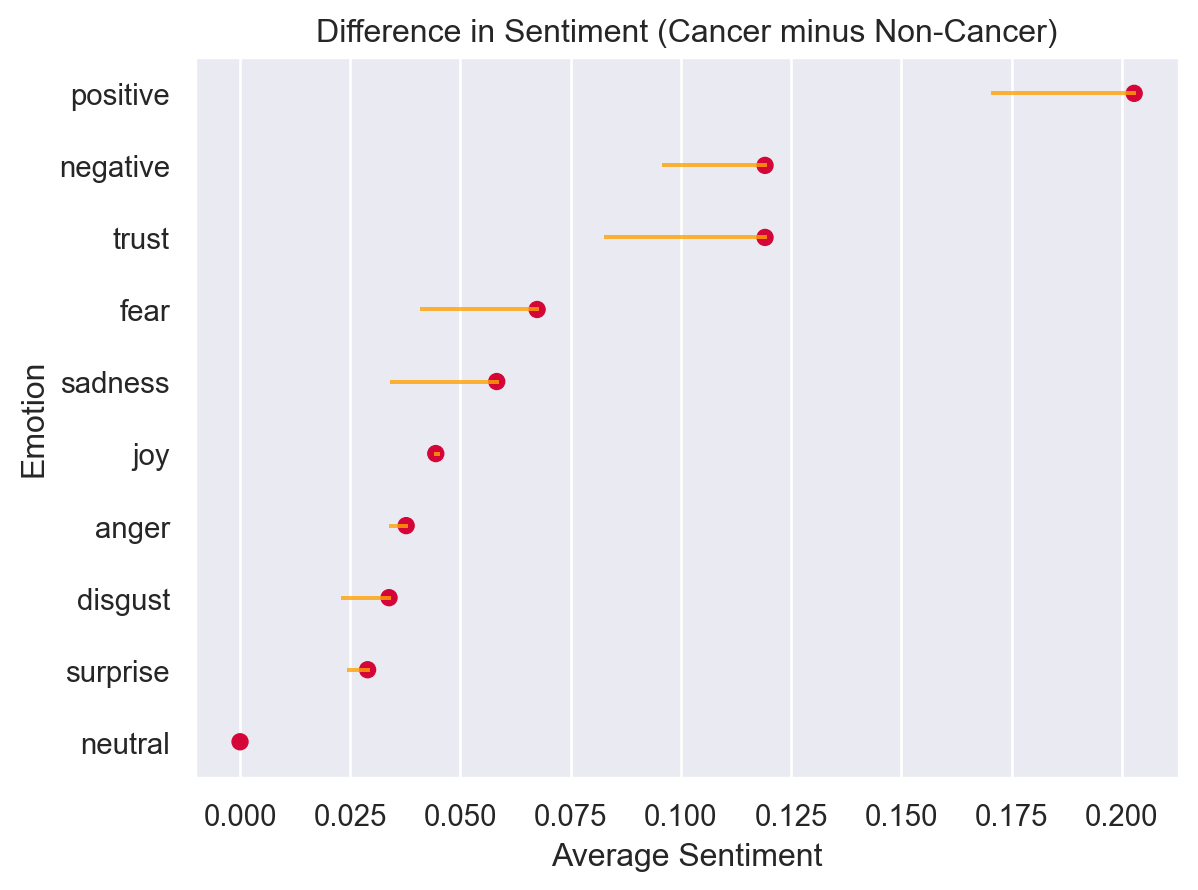

In [23]:
total_country = total_country.sort_values("Cancer",  ascending=False)




p = (so.Plot(total_country,  y = "Emotion", xmin = "Non-Cancer", xmax="Cancer")
  .add(so.Range(alpha=0.8, color='#ffa205'))
  .add(so.Dot(color='#d40637'), x = "Cancer")
  .label(x = "Average Sentiment", y = "Emotion", title="Difference in Sentiment (Cancer minus Non-Cancer)")
 #.layout(size=(6,26))
 )

p

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

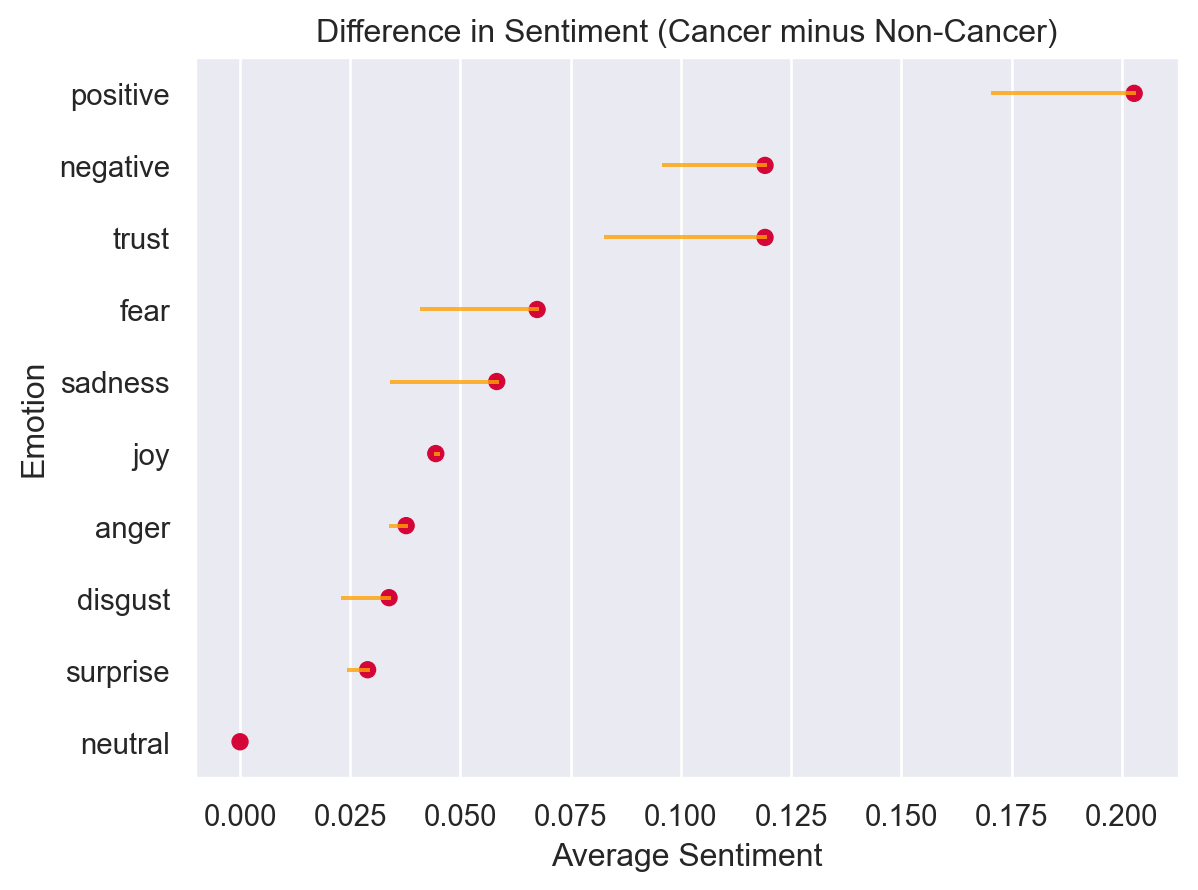

In [24]:
p.save("../images/average_sentiment_nrc.png", dpi=300)